<a href="https://colab.research.google.com/github/Cindy12MYG/PUC/blob/main/Test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN CURSO ANALISIS DE DATOS - PUC EEIGM October 2024 (20min)
Test 1 |
**Raúl Benítez**

1. Use the function load_dataset from the seaborn libarry to load the dataset 'diamonds'

https://seaborn.pydata.org/generated/seaborn.load_dataset.html

In [ ]:
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds.head()

2. Eliminad las variables 'carat', 'color', 'clarity'. Utilizaremos 'table', 'price', 'x', 'y' y 'z' como features y la variable 'cut' como etiqueta de clase.


In [ ]:
diamonds_2 = diamonds.drop(['carat', 'color', 'clarity'], axis=1)
diamonds_2.head()

,cut,depth,table,price,x,y,z
0,Ideal,61.5,55.0,326,3.95,3.98,2.43
1,Premium,59.8,61.0,326,3.89,3.84,2.31
2,Good,56.9,65.0,327,4.05,4.07,2.31
3,Premium,62.4,58.0,334,4.20,4.23,2.63
4,Good,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
X = diamonds_2.drop('cut', axis=1)
y = diamonds_2['cut']

,depth,table,price,x,y,z
0,61.5,55.0,326,3.95,3.98,2.43
1,59.8,61.0,326,3.89,3.84,2.31
2,56.9,65.0,327,4.05,4.07,2.31
3,62.4,58.0,334,4.20,4.23,2.63
4,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,60.8,57.0,2757,5.75,5.76,3.50
53936,63.1,55.0,2757,5.69,5.75,3.61
53937,62.8,60.0,2757,5.66,5.68,3.56
53938,61.0,58.0,2757,6.15,6.12,3.74


3. Representad los datos mediante un scatter plot matrix utilizando colores diferentes para cada clase

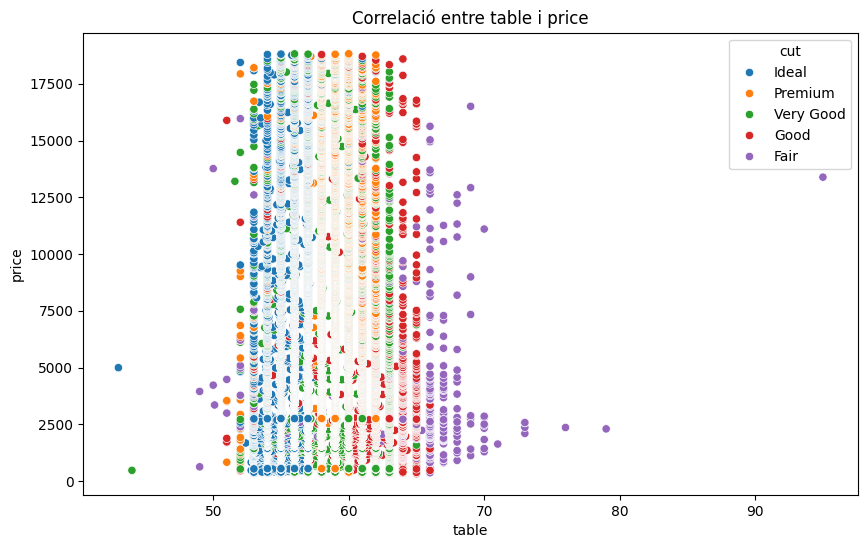

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="table", y="price", hue='cut', data=diamonds_2)
ax.set_title('Correlació entre table i price')
plt.show()


4. Dividid los datos en los subconjuntos de entrenamiento (70%) y test (30%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

5. Ajustad 5 modelos de clasificación: KNN, Gaussian Naive Bayes, Decision Trees, Quadratic Discriminant Analysis (QDA). Reportar las matrices de confusion y el classification report.

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html

¿Qué modelo de clasificación presenta un mayor promeio del F1-score?


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import tree

knn = KNeighborsClassifier(n_neighbors=3)
y_knn_pred = knn.fit(X_train, y_train).predict(X_test)
CM_KNN = confusion_matrix(y_test, y_knn_pred)
print('CONFUSION MATRIX KNN: \n {} '.format(CM_KNN))

print(classification_report(y_test, y_knn_pred))

gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train, y_train).predict(X_test)
CM_NB = confusion_matrix(y_test, y_NB_pred)
print('CONFUSION MATRIX NB: \n {}'.format(CM_NB))

print(classification_report(y_test, y_NB_pred))

dt = tree.DecisionTreeClassifier()
y_DT_pred = dt.fit(X_train,y_train).predict(X_test)
CM_DT = confusion_matrix(y_test, y_DT_pred)
print('CONFUSION MATRIX DT: \n {}'.format(CM_DT))

print(classification_report(y_test, y_DT_pred))


dt = dt.fit(X_train,y_train)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plot_tree(dt)
plt.show()

CONFUSION MATRIX KNN: 
 [[ 131  138   66   64   98]
 [  85  457  281  274  357]
 [  31  213 5327  470  505]
 [  46  310 1024 2143  583]
 [  57  445 1318  851  908]] 
              precision    recall  f1-score   support

        Fair       0.37      0.26      0.31       497
        Good       0.29      0.31      0.30      1454
       Ideal       0.66      0.81      0.73      6546
     Premium       0.56      0.52      0.54      4106
   Very Good       0.37      0.25      0.30      3579

    accuracy                           0.55     16182
   macro avg       0.45      0.43      0.44     16182
weighted avg       0.53      0.55      0.54     16182

CONFUSION MATRIX NB: 
 [[ 191  250    4   19   33]
 [  52  293  222  252  635]
 [   1    2 5746  685  112]
 [   1   52  923 2677  453]
 [   8  149 1365 1289  768]]
              precision    recall  f1-score   support

        Fair       0.75      0.38      0.51       497
        Good       0.39      0.20      0.27      1454
       Ideal      

El modelo de clasificación que presenta un mayor promeio del F1-score es el modelo : Decision Tree